
#**Exploring relationships betweeen Genes and Chemicals**
Run this section before exploring further. (Please note that some modules make take time to load)
---



---







## Set up the notebook

In [1]:
#!pip install ipysigma
#!pip install networkx
#!pip install "ipywidgets>=7,<8"
#!pip install ipysigma
#!pip install ipydatagrid

In [2]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import networkx as nx
from ipysigma import Sigma
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display, clear_output
from ipywidgets import Layout, Button, Box, VBox, HBox, GridspecLayout, Button, Layout

/Users/polinaminkovski/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Read in our full datafile

In [3]:
url = "https://raw.githubusercontent.com/polinamin/gene_chemical_interaction/main/complete_dataset.csv"
df = pd.read_csv(url, low_memory=False)
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
url = "https://raw.githubusercontent.com/polinamin/gene_chemical_interaction/main/Diseases.csv"
diseases = pd.read_csv(url, low_memory=False)

In [5]:
df["edges"] = list(df[['Gene_Name', 'chemical_name', 'Degree']].itertuples(index=False, name=None))

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
%%html
<style>
    .output {
        overflow: hidden;
    }
</style>


In [8]:
%%capture
df[df["InteractionActions"] == "decreases^reaction|increases^expression"].sort_values("GeneID")

In [9]:
filter_RPL_test = df[df["Disease"].astype(str).str.lower().str.contains("recurrent") & df["Disease"].astype(str).str.lower().str.contains("pregnancy") & df["Disease"].astype(str).str.lower().str.contains("loss")]
rpl_genes = filter_RPL_test["Gene_Name"].unique()

In [10]:
rpl_df = df[df["Gene_Name"].isin(rpl_genes)]

In [11]:
filter_RPL_diseases = []
filter_RPL_disease = []
for i,r in diseases.iterrows():
  for j,k in rpl_df.iterrows():
    if r["Diseases"] in (k["Disease"]):
      filter_RPL_diseases.append(r["Diseases"])
      filter_RPL_disease.append(k["Disease"])
rpl_diseases = pd.DataFrame({"Diseases_Abr": filter_RPL_diseases,"Disease": filter_RPL_disease})
rpl_diseases_grouped = rpl_diseases.groupby("Disease").agg(set)

In [12]:
merge = pd.merge(left=rpl_df, right = rpl_diseases_grouped, left_on = "Disease", right_on = "Disease", how="left")

#**Gene-Chemical Interaction**

Sigma(nx.MultiGraph with 194 nodes and 726 edges)

Output()

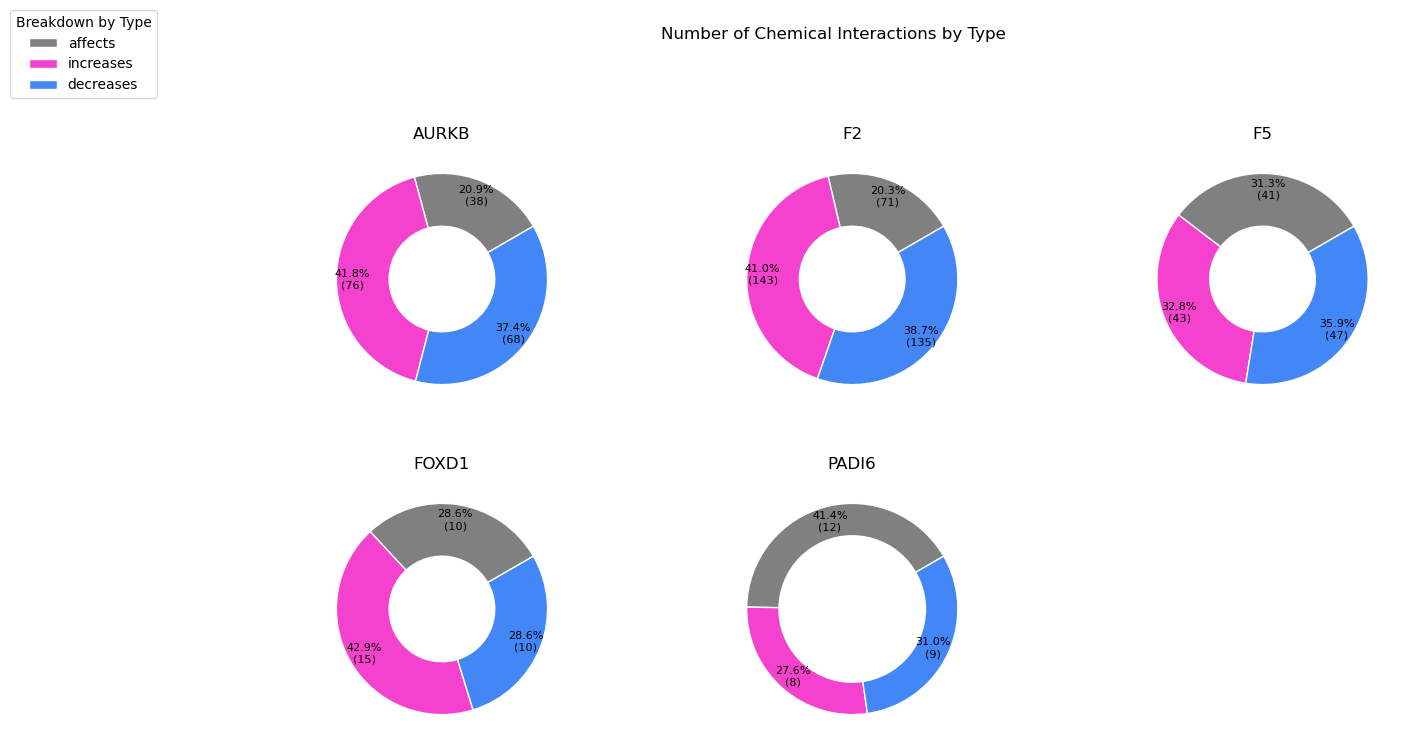

None

,Gene Name,Chemical Name,Interaction,Gene Effect,Variant(s),Disease,Phenotype,Organism,Gene Form
11415,AURKB,"1,4-bis(2-(3,5-dichloropyridyloxy))benzene",increases^expression,Maternal,SNV,"Pregnancy loss, recurrent",NaN,Mus musculus,mRNA
11416,AURKB,"16-hydroxycleroda-3,13(14)-dien-15,16-olide",decreases^expression,Maternal,SNV,"Pregnancy loss, recurrent",NaN,Homo sapiens,mRNA
11417,AURKB,"16-hydroxycleroda-3,13(14)-dien-15,16-olide",decreases^expression,Maternal,SNV,"Pregnancy loss, recurrent",NaN,Homo sapiens,protein
11418,AURKB,1-cyclopropyl-3-(3-(5-morpholin-4-ylmethyl-1H-...,decreases^phosphorylation,Maternal,SNV,"Pregnancy loss, recurrent",NaN,Homo sapiens,protein
11419,AURKB,1-cyclopropyl-3-(3-(5-morpholin-4-ylmethyl-1H-...,decreases^phosphorylation,Maternal,SNV,"Pregnancy loss, recurrent",NaN,Mus musculus,protein
11420,AURKB,1-Methyl-4-phenylpyridinium,decreases^expression,Maternal,SNV,"Pregnancy loss, recurrent",NaN,Homo sapiens,mRNA
11421,AURKB,1-Methyl-4-phenylpyridinium,increases^expression,Maternal,SNV,"Pregnancy loss, recurrent",NaN,Mus musculus,protein
11422,AURKB,1-Naphthylisothiocyanate,increases^expression,Maternal,SNV,"Pregnancy loss, recurrent",NaN,Rattus norvegicus,mRNA
11423,AURKB,1-Naphthylisothiocyanate,increases^expression,Maternal,SNV,"Pregnancy loss, recurrent",NaN,Rattus norvegicus,protein
11424,AURKB,"2,2',3',4,4',5-hexachlorobiphenyl",affects^cotreatment,Maternal,SNV,"Pregnancy loss, recurrent",NaN,Mus musculus,mRNA


In [14]:
#@title Plot Network (double click to hide/show code)
#@markdown Run the code. Then, select the genes and interactions you're interested in exploring and click the "UPDATE" button to see the visualization. Use the "CNTRL" button to make more than one selection.
filtered = pd.DataFrame()
output = widgets.Output()

dropdown_gene = widgets.SelectMultiple(description = "Select Gene:",
                                 options = sorted(rpl_df.Gene_Name.unique()))
dropdown_chemical = widgets.SelectMultiple(description = "Select Chemical:",
                                options = sorted(rpl_df.chemical_name.unique()))
dropdown_disease = widgets.Combobox(description = "Select Disease:",
                                options = sorted(set(filter_RPL_diseases)))


update_button = widgets.Button(description = "UPDATE")
update_button.style.button_color = "#51ABAC"

def sigmagraph():
  if (len(dropdown_gene.value)==0) and (len(dropdown_chemical.value)== 0) and (len(dropdown_disease.value)== 0):
    filtered = rpl_df
  elif len(dropdown_gene.value)== 0 and (len(dropdown_disease.value)== 0):
    filtered = rpl_df[rpl_df.chemical_name.isin(dropdown_chemical.value)]
  elif len(dropdown_chemical.value) == 0 and (len(dropdown_disease.value)== 0):
    filtered = rpl_df[rpl_df.Gene_Name.isin(dropdown_gene.value)]
  elif len(dropdown_gene.value) == 0 and (len(dropdown_chemical.value)== 0):
    filtered = rpl_df[(rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False))]
  elif len(dropdown_gene.value) == 0:
    filtered = rpl_df[(rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False)) & (rpl_df.chemical_name.isin(dropdown_chemical.value))]
  elif len(dropdown_chemical.value) == 0:
    filtered = rpl_df[(rpl_df.Gene_Name.isin(dropdown_gene.value)) & (rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False))]
  elif len(dropdown_disease.value) == 0:
    filtered = rpl_df[(rpl_df.Gene_Name.isin(dropdown_gene.value)) & (rpl_df.chemical_name.isin(dropdown_chemical.value))]
  else:
    filtered = rpl_df[(rpl_df.Gene_Name.isin(dropdown_gene.value)) & (rpl_df.chemical_name.isin(dropdown_chemical.value)) & (rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False))]


  filtered_ = filtered[["Gene Effect", "Variant(s)", "Disease", "OMIM Phenotype", "Gene_Name", "chemical_name", "InteractionActions"]]
  df_filtered = pd.DataFrame({
    "Gene": filtered["Gene_Name"],
    "Chemical": filtered["chemical_name"],
    "Degree": filtered["Degree"],
    "Type": filtered["Type"],
    "Disease": filtered["Disease"],
    "Edges": filtered["edges"]
  })

  g = nx.MultiGraph()
  relations = list(filtered["edges"])
  for i in relations:
      g.add_edge(i[0], i[1], relation = i[2])

  def nsize(node):
    if node in filtered["Gene_Name"].values:
      count_size = filtered["Gene_Name"].value_counts()[node]
    elif node in filtered["chemical_name"].values:
      count_size = filtered["chemical_name"].value_counts()[node]
    else:
      count_size = 0
    return count_size
  def ncolor(node):
    node_color_dict = {"darkslategray": "Gene", "mediumturquoise": "Chemical"}
    if node in filtered["Gene_Name"].unique():
      color = "darkslategray"
    else:
      color = "mediumturquoise"
    return node_color_dict[color]
  def edgecolor(edge):
    color_dict = {"#f542ce": "increases", "#4287f5": "decreases", "#808080": "affects"}
    color_dict_inv = {"increases":"#f542ce", "decreases":"#4287f5","affects": "#808080"}
    if edge["relation"] == "increases":
      colore = color_dict_inv["increases"]
    elif edge["relation"] == "decreases":
      colore = color_dict_inv["decreases"]
    else:
      colore = color_dict_inv["affects"]
    return color_dict[colore]

  sigma = Sigma(g,
        show_all_labels=True,
        node_size= [nsize(node)*100 for node in list(g.nodes())],
        node_color = [ncolor(node) for node in list(g.nodes())],
        edge_color = [edgecolor(edge) for edge in list(dict(g.edges).values())],
        height = 500
  )

  return sigma

def summarygraph():
  if (len(dropdown_gene.value)==0) and (len(dropdown_chemical.value)== 0) and (len(dropdown_disease.value)== 0):
    filtered = rpl_df
    sizes = tuple(rpl_genes)
  elif len(dropdown_gene.value)== 0 and (len(dropdown_disease.value)== 0):
    filtered = rpl_df[rpl_df.chemical_name.isin(dropdown_chemical.value)]
    sizes = tuple(list(filtered["Gene_Name"].unique()))
  elif len(dropdown_chemical.value) == 0 and (len(dropdown_disease.value)== 0):
    filtered = rpl_df[rpl_df.Gene_Name.isin(dropdown_gene.value)]
    sizes = tuple(list(filtered["Gene_Name"].unique()))
  elif len(dropdown_gene.value) == 0 and (len(dropdown_chemical.value)== 0):
    filtered = rpl_df[(rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False))]
    sizes = tuple(list(filtered["Gene_Name"].unique()))
  elif len(dropdown_gene.value) == 0:
    filtered = rpl_df[(rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False)) & (rpl_df.chemical_name.isin(dropdown_chemical.value))]
    sizes = tuple(list(filtered["Gene_Name"].unique()))
  elif len(dropdown_chemical.value) == 0:
    filtered = rpl_df[(rpl_df.Gene_Name.isin(dropdown_gene.value)) & (rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False))]
    sizes = tuple(list(filtered["Gene_Name"].unique()))
  elif len(dropdown_disease.value) == 0:
    filtered = rpl_df[(rpl_df.Gene_Name.isin(dropdown_gene.value)) & (rpl_df.chemical_name.isin(dropdown_chemical.value))]
    sizes = tuple(list(filtered["Gene_Name"].unique()))
  else:
    filtered = rpl_df[(rpl_df.Gene_Name.isin(dropdown_gene.value)) & (rpl_df.chemical_name.isin(dropdown_chemical.value)) & (rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False))]
    sizes = tuple(list(filtered["Gene_Name"].unique()))

  filtered_ = filtered[["Gene Effect", "Variant(s)", "Disease", "OMIM Phenotype", "Gene_Name", "chemical_name", "InteractionActions"]]
  groups_chemical = pd.DataFrame(rpl_df.groupby("chemical_name")["Gene_Name"].agg("count")).reset_index()
  crosstab = pd.crosstab(rpl_df['Gene_Name'],rpl_df['Degree']).reset_index()

  donut = plt.figure(figsize=(15, 12))
  donut.subplots_adjust(hspace=0.25)
  # Adding Title of chart
  donut.suptitle('Number of Chemical Interactions by Type')

  my_color =['#808080', '#f542ce','#4287f5']
  labels = ["affects", "increases", "decreases"]
  # Setting size in Chart based on
  # given values

  values = crosstab[crosstab["Gene_Name"].isin(sizes)]

  # explosion
  explode = (0.05, 0.05, 0.05)

  def func(pct, allvals): #adjust label to show % and #
      absolute = int(np.round(pct/100.*np.sum(allvals)))
      return f"{pct:.1f}%\n({absolute:d})"

  for fig, axes in enumerate(sizes+tuple("")):
      # add a new subplot iteratively
          if axes != "":
            ax = plt.subplot(3, 3, fig + 1)

            # filter df and plot ticker on the new subplot axis
            ax.pie(crosstab.loc[crosstab["Gene_Name"]==axes,["affects","increases","decreases"]].values.flatten().tolist(),
                  wedgeprops={'width':.5, 'edgecolor':'white'}, startangle=30, colors=my_color,
                    autopct=lambda pct: func(pct, crosstab.loc[crosstab["Gene_Name"]==axes,["affects","increases","decreases"]].values.flatten().tolist()), pctdistance=0.85, textprops={"fontsize":8})
            ax.set(ylabel='', title=axes, aspect='equal')
          else:
            ax.set_visible(False)

  # draw circle
  centre_circle = plt.Circle((0, 0), 0.7, fc='white')
  fig = plt.gcf()

  # Adding Circle in Pie chart
  fig.gca().add_artist(centre_circle)

  # Add Legend
  donut.legend(labels=labels,
      loc="upper center",title="Breakdown by Type", bbox_to_anchor=(0., 1))

  # Displaying Chart
  plt.show()


def filteredtable():
  if (len(dropdown_gene.value)==0) and (len(dropdown_chemical.value)== 0) and (len(dropdown_disease.value)== 0):
    filtered = rpl_df
  elif len(dropdown_gene.value)== 0 and (len(dropdown_disease.value)== 0):
    filtered = rpl_df[rpl_df.chemical_name.isin(dropdown_chemical.value)]
  elif len(dropdown_chemical.value) == 0 and (len(dropdown_disease.value)== 0):
    filtered = rpl_df[rpl_df.Gene_Name.isin(dropdown_gene.value)]
  elif len(dropdown_gene.value) == 0 and (len(dropdown_chemical.value)== 0):
    filtered = rpl_df[(rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False))]
  elif len(dropdown_gene.value) == 0:
    filtered = rpl_df[(rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False)) & (rpl_df.chemical_name.isin(dropdown_chemical.value))]
  elif len(dropdown_chemical.value) == 0:
    filtered = rpl_df[(rpl_df.Gene_Name.isin(dropdown_gene.value)) & (rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False))]
  elif len(dropdown_disease.value) == 0:
    filtered = rpl_df[(rpl_df.Gene_Name.isin(dropdown_gene.value)) & (rpl_df.chemical_name.isin(dropdown_chemical.value))]
  else:
    filtered = rpl_df[(rpl_df.Gene_Name.isin(dropdown_gene.value)) & (rpl_df.chemical_name.isin(dropdown_chemical.value)) & (rpl_df.Disease.str.contains(dropdown_disease.value, na=False,regex=False))]


  filtered_ = filtered[["Gene_Name", "chemical_name", "InteractionActions_list", "Gene Effect", "Variant(s)", "Disease", "OMIM Phenotype", "Organism", "GeneForms"]]
  filtered_.columns = ["Gene Name", "Chemical Name", "Interaction", "Gene Effect", "Variant(s)", "Disease", "Phenotype", "Organism", "Gene Form"]
#      data_table.DataTable(filtered_(), include_index=False, num_rows_per_page=10)
  return filtered_

def HBox(*pargs, **kwargs):
    box = Box(*pargs, **kwargs)
    box.layout.display = 'flex'
    box.layout.align_items = 'stretch'
    box.layout.flex_flow = 'columns'
    box.layout.width ='70%'
    return box

state_out = widgets.Output()
with state_out:
  print('Select values to view chart')

controls = VBox([
    HBox([dropdown_gene, dropdown_chemical, dropdown_disease, update_button])])

def on_button_clicked(b):
    clear_output()
    state_out.clear_output()
    with state_out:
        print("Filtered to '%s' and '%s'" % (dropdown_gene.value, dropdown_chemical.value))
    display(sigmagraph(), state_out, controls)
    display(summarygraph())
    display(filteredtable())

update_button.on_click(on_button_clicked)

display(sigmagraph(), state_out, controls)
display(summarygraph())
display(filteredtable())